In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 46 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Carbon concentration / weight %                        1652 non-null   float64
 1   Silicon concentration / weight %                       1652 non-null   float64
 2   Manganese concentration / weight %                     1652 non-null   float64
 3   Sulphur concentration / weight %                       1648 non-null   float64
 4   Phosphorus concentration / weight %                    1642 non-null   float64
 5   Nickel concentration / weight %                        697 non-null    float64
 6   Chromium concentration / weight %                      784 non-null    float64
 7   Molybdenum concentration / weight %                    793 non-null    float64
 8   Vanadium concentration / weight %               

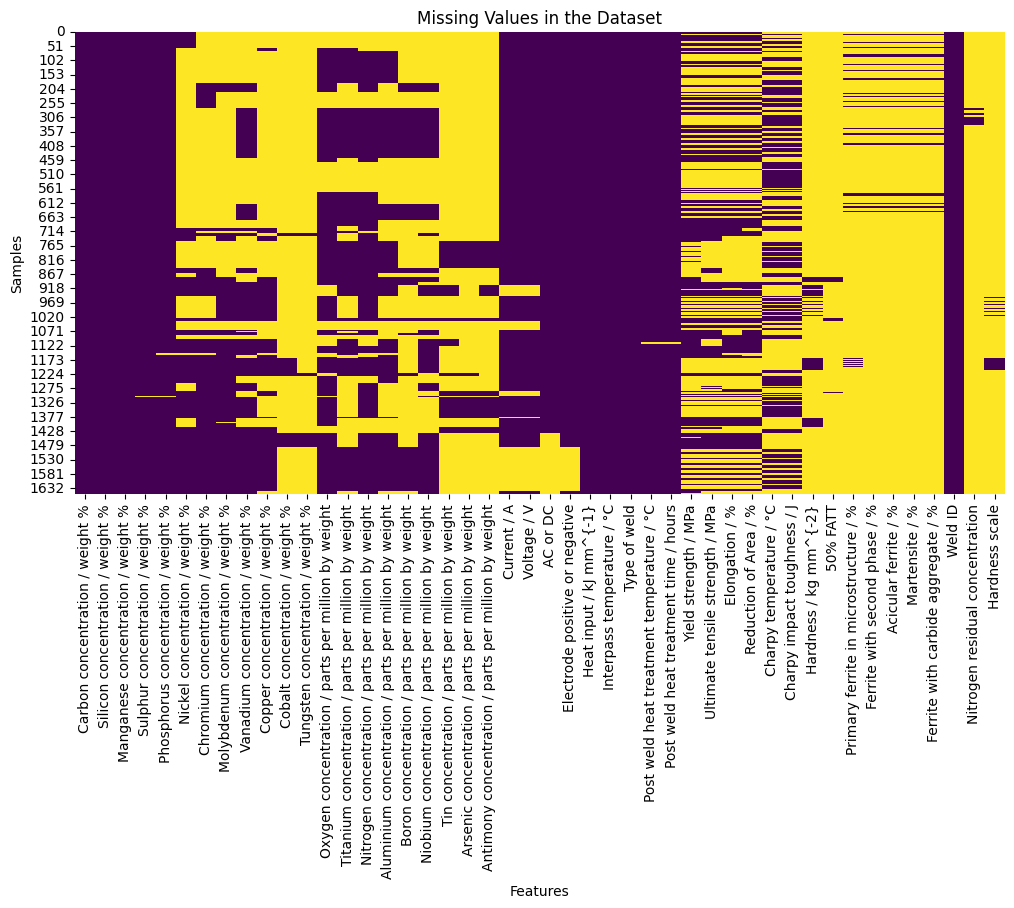

In [ ]:
data = pd.read_csv('../data/welddb_cleaned.csv')
data.info()

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Missing Values in the Dataset')
plt.show()

C:\Users\Martin\AppData\Local\Temp\ipykernel_44896\3929090547.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.fillna(np.nan, inplace=True)


   Yield strength / MPa  Ultimate tensile strength / MPa  Elongation / %  \
0                 392.0                            466.0            31.9   
1                   NaN                              NaN             NaN   
2                 370.0                            456.0            35.2   
3                 413.0                            498.0            31.2   
4                   NaN                              NaN             NaN   

   Reduction of Area / %  Charpy impact toughness / J  
0                   80.6                          NaN  
1                    NaN                        100.0  
2                   80.6                        100.0  
3                   80.6                          NaN  
4                    NaN                        100.0  
{'all_targets': 134, 'all_targets_except_charpy': 516, 'charpy_only': 735, 'other': 267}


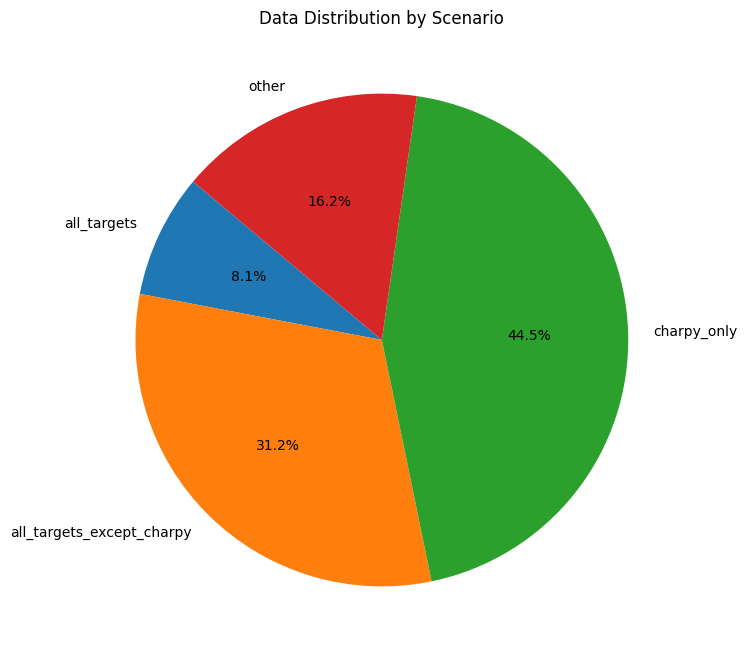

In [ ]:
# we have 4 main scenarios to handle missing values:
# - we have all the target values, except Charpy impact toughness
# - we have Charpy impact toughness,
# - we have all the target values
# - other cases (ie for example 2 target values)

target_labels = ['Yield strength / MPa', 
                 'Ultimate tensile strength / MPa', 
                 'Elongation / %', 
                 'Reduction of Area / %', 
                 'Charpy impact toughness / J']

scenarios = {
    'all_targets': target_labels,
    'all_targets_except_charpy': target_labels[:-1],
    'charpy_only': target_labels[-1],
    'other': []
}

target_df = data[target_labels]
target_df.fillna(np.nan, inplace=True)
print(target_df.head())

scenarios_count = {}
for s in scenarios.keys():
    scenarios_count[s] = 0

for i, row in target_df.iterrows():
    missing_values = row.isnull().sum()
    
    if missing_values == 0:
        scenarios_count['all_targets'] += 1
    elif missing_values == 1 and pd.isna(row['Charpy impact toughness / J']):
        scenarios_count['all_targets_except_charpy'] += 1
    elif missing_values == 4 and not pd.isna(row['Charpy impact toughness / J']):
        scenarios_count['charpy_only'] += 1
    else:
        scenarios_count['other'] += 1

print(scenarios_count)

plt.figure(figsize=(8, 8))
plt.pie(scenarios_count.values(), labels=scenarios_count.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Data Distribution by Scenario')
plt.show()




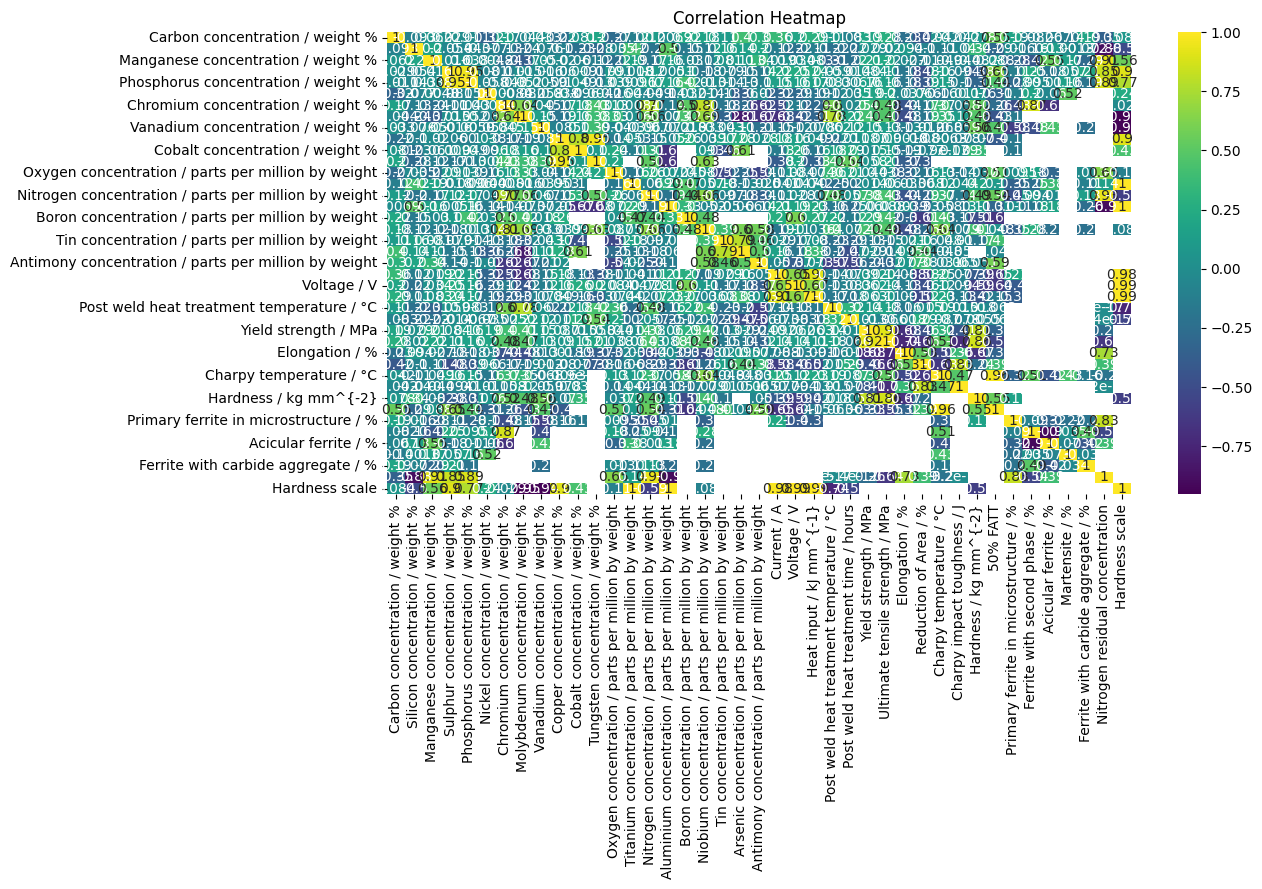

In [ ]:
quantitative = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 6))
sns.heatmap(quantitative.corr(), cmap='viridis', annot=True)
plt.title('Correlation Heatmap')
plt.show()

